In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
OUTPUTS_DIR = os.path.join(PROJECT_ROOT, "outputs")
FIG_DIR = os.path.join(PROJECT_ROOT, "reports", "figures")
os.makedirs(FIG_DIR, exist_ok=True)

baseline_path = os.path.join(OUTPUTS_DIR, "baseline_results.csv")
ml_path = os.path.join(OUTPUTS_DIR, "ml_model_results.csv")
dl_path = os.path.join(OUTPUTS_DIR, "dl_results_lstm_gru.csv")

baseline = pd.read_csv(baseline_path)
ml = pd.read_csv(ml_path)
dl = pd.read_csv(dl_path)

baseline.head(), ml.head(), dl.head()


(        City split  Naive_MAE  Naive_RMSE  Naive_sMAPE  SNaive_MAE  \
 0  Bengaluru   val  28.220471   66.406153    24.086772   42.612518   
 1  Bengaluru  test  23.471867   30.791394    28.427919   38.006846   
 2      Delhi   val  46.211178   63.142464    21.889198   69.489316   
 3      Delhi  test  29.662738   41.429295    17.235311   58.444041   
 4     Mumbai   val  12.045688   17.111079    13.651348   23.594518   
 
    SNaive_RMSE  SNaive_sMAPE    n  
 0    81.565258     36.012057  182  
 1    48.839397     43.872505  183  
 2    90.438174     31.214213  182  
 3    79.493961     29.285043  183  
 4    30.684020     25.973733  182  ,
         City             Model Split        MAE       RMSE      sMAPE    n
 0  Bengaluru  LinearRegression   val  31.723824  66.753122  26.449206  147
 1  Bengaluru  LinearRegression  test  27.496355  35.414938  30.837405  167
 2  Bengaluru      RandomForest   val  30.483979  64.512233  25.663071  147
 3  Bengaluru      RandomForest  test  24.736

In [ ]:
# baseline columns expected:
# City, Split, Naive_MAE, Naive_RMSE, Naive_sMAPE, SNaive_MAE, SNaive_RMSE, SNaive_sMAPE, n

baseline=baseline.copy()

# Normalize column names (in case your file uses 'split' instead of 'Split', etc.)
baseline=baseline.rename(columns={"split": "Split"})

naive_long=baseline[["City","Split","Naive_MAE","Naive_RMSE","Naive_sMAPE","n"]].copy()
naive_long["Model"]="Naive"
naive_long=naive_long.rename(columns={"Naive_MAE":"MAE","Naive_RMSE":"RMSE","Naive_sMAPE":"sMAPE"})

snaive_long=baseline[["City","Split","SNaive_MAE","SNaive_RMSE","SNaive_sMAPE","n"]].copy()
snaive_long["Model"]="SeasonalNaive"
snaive_long = snaive_long.rename(columns={"SNaive_MAE":"MAE","SNaive_RMSE":"RMSE","SNaive_sMAPE":"sMAPE"})

baseline_long=pd.concat([naive_long,snaive_long],ignore_index=True)
baseline_long.head()


,City,Split,MAE,RMSE,sMAPE,n,Model
0,Bengaluru,val,28.220471,66.406153,24.086772,182,Naive
1,Bengaluru,test,23.471867,30.791394,28.427919,183,Naive
2,Delhi,val,46.211178,63.142464,21.889198,182,Naive
3,Delhi,test,29.662738,41.429295,17.235311,183,Naive
4,Mumbai,val,12.045688,17.111079,13.651348,182,Naive


In [ ]:
ml=ml.copy().rename(columns={"model":"Model","split":"Split"})
dl=dl.copy().rename(columns={"model":"Model","split":"Split"})

# Ensure consistent column order
ml_long=ml[["City","Model","Split","MAE","RMSE","sMAPE","n"]].copy()
dl_long=dl[["City","Model","Split","MAE","RMSE","sMAPE","n"]].copy()

all_results=pd.concat([baseline_long,ml_long,dl_long],ignore_index=True)

# Clean Split
all_results["Split"] = all_results["Split"].replace({"validation": "val","test_set":"test"})

all_results.head()


,City,Split,MAE,RMSE,sMAPE,n,Model
0,Bengaluru,val,28.220471,66.406153,24.086772,182,Naive
1,Bengaluru,test,23.471867,30.791394,28.427919,183,Naive
2,Delhi,val,46.211178,63.142464,21.889198,182,Naive
3,Delhi,test,29.662738,41.429295,17.235311,183,Naive
4,Mumbai,val,12.045688,17.111079,13.651348,182,Naive


In [ ]:
final_csv_path=os.path.join(OUTPUTS_DIR,"final_model_comparison.csv")
all_results.to_csv(final_csv_path, index=False)
print("Saved:",final_csv_path)

all_results.groupby(["City","Split", "Model"]).size().head(10)


Saved: c:\Users\arjun\aqi-forecasting-india-ml-dl\outputs\final_model_comparison.csv


City       Split  Model           
Bengaluru  test   GRU                 1
                  LSTM                1
                  LinearRegression    1
                  Naive               1
                  RandomForest        1
                  SeasonalNaive       1
           val    GRU                 1
                  LSTM                1
                  LinearRegression    1
                  Naive               1
dtype: int64

In [ ]:
MODEL_ORDER = ["Naive", "SeasonalNaive", "LinearRegression", "RandomForest", "LSTM", "GRU"]

def plot_metric_for_city(city: str, split_name: str, metric: str):
    tmp = all_results[(all_results["City"]==city) & (all_results["Split"] == split_name)].copy()
    tmp["Model"] = pd.Categorical(tmp["Model"], categories=MODEL_ORDER, ordered=True)
    tmp = tmp.sort_values("Model")

    plt.figure(figsize=(10, 4))
    plt.bar(tmp["Model"].astype(str), tmp[metric].values)
    plt.title(f"{city}—{split_name.upper()} — {metric} comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()

    out_path = os.path.join(FIG_DIR, f"{city}_{split_name}_{metric}.png".replace(" ", ""))
    plt.savefig(out_path, dpi=200)
    plt.show()

    print("Saved figure:", out_path)


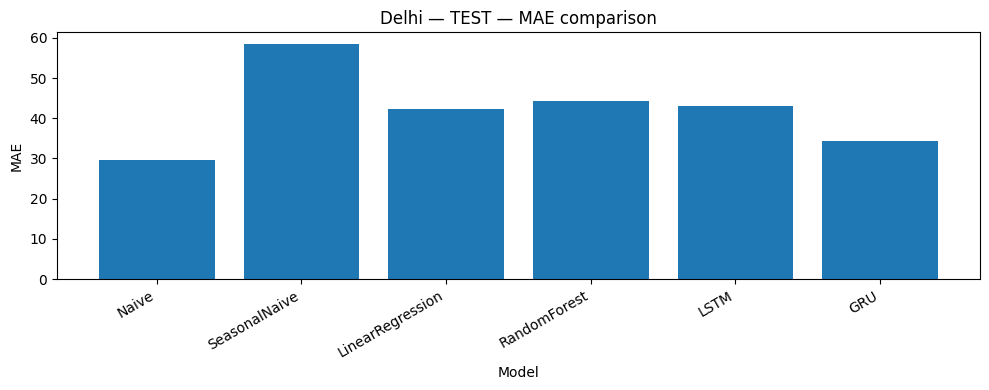

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Delhi_test_MAE.png


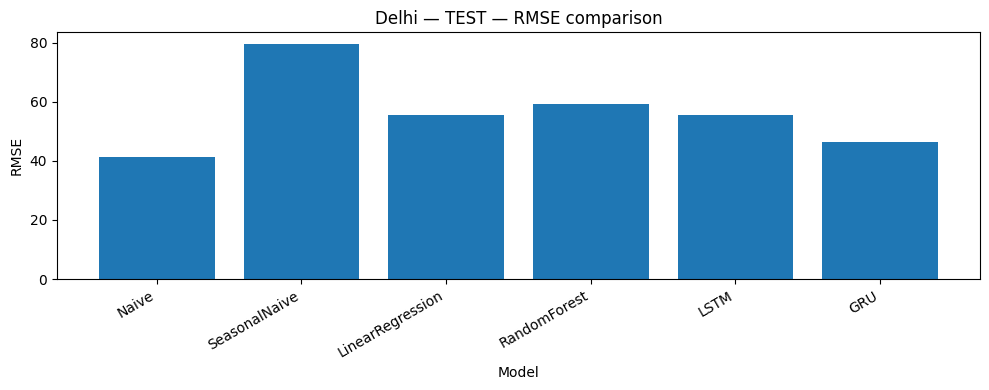

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Delhi_test_RMSE.png


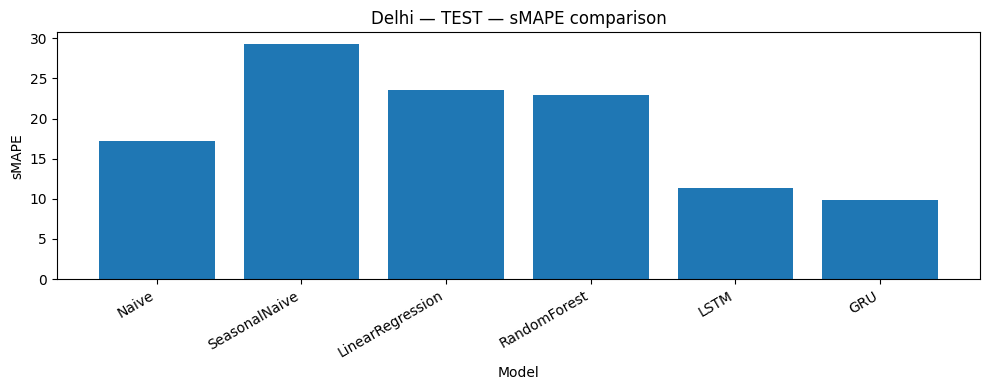

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Delhi_test_sMAPE.png


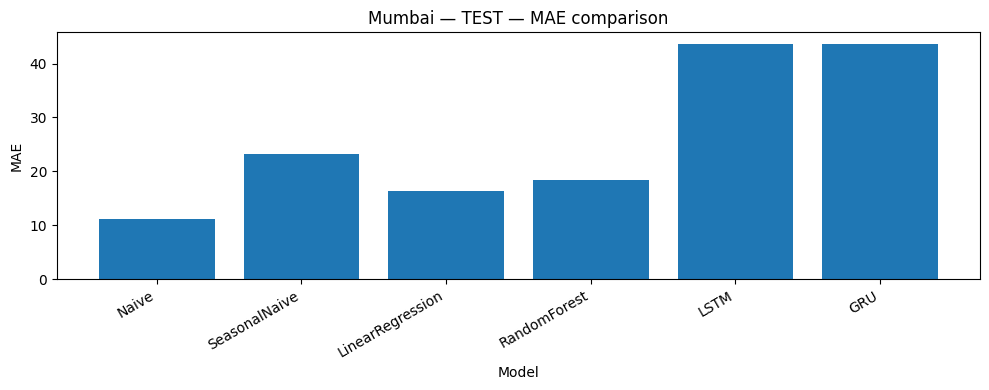

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Mumbai_test_MAE.png


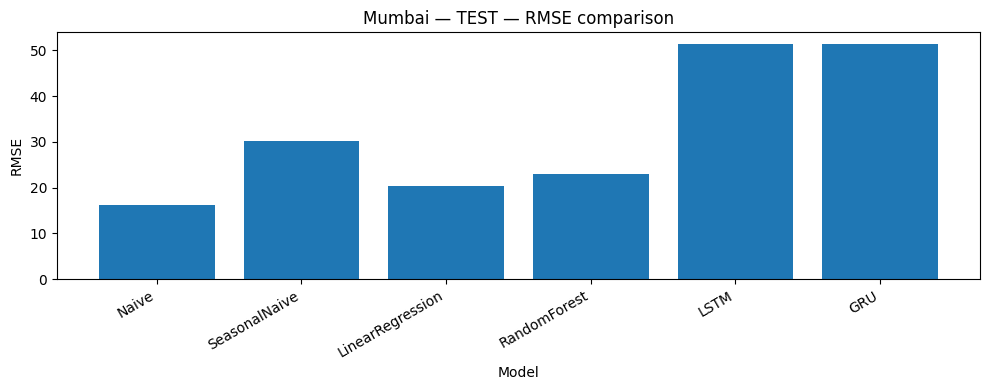

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Mumbai_test_RMSE.png


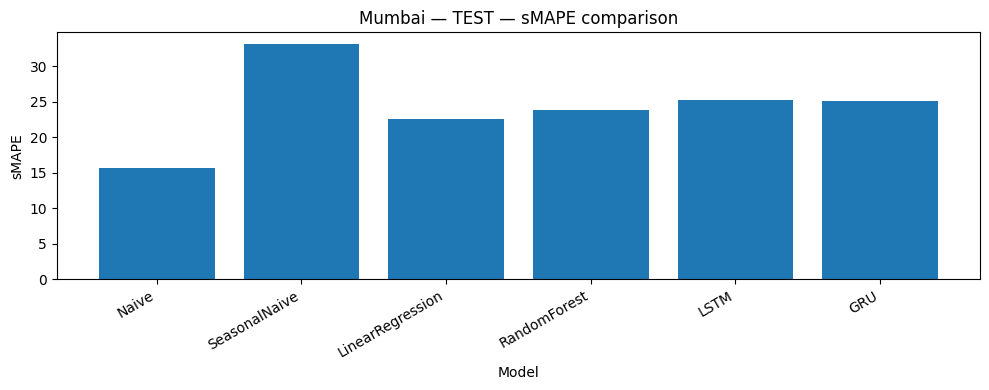

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Mumbai_test_sMAPE.png


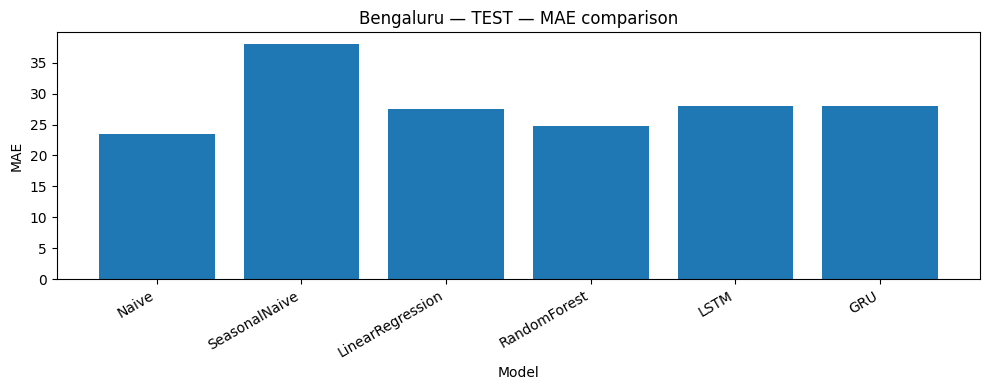

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Bengaluru_test_MAE.png


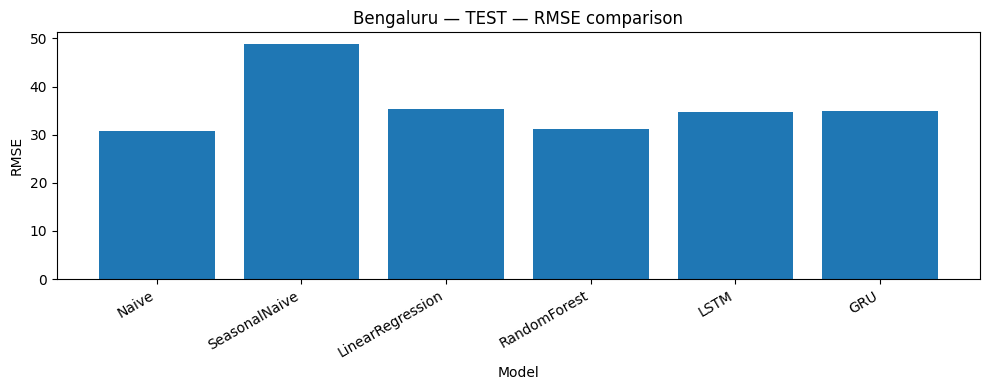

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Bengaluru_test_RMSE.png


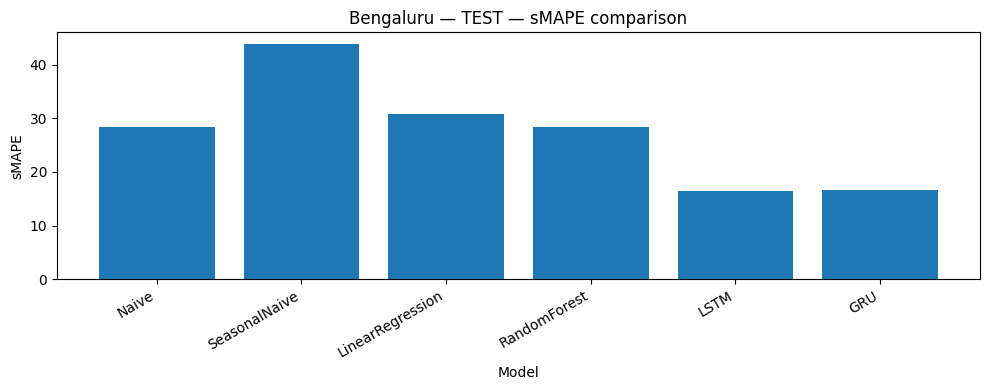

Saved figure: c:\Users\arjun\aqi-forecasting-india-ml-dl\reports\figures\Bengaluru_test_sMAPE.png


In [7]:
for city in ["Delhi", "Mumbai", "Bengaluru"]:
    plot_metric_for_city(city, "test", "MAE")
    plot_metric_for_city(city, "test", "RMSE")
    plot_metric_for_city(city, "test", "sMAPE")


In [8]:
test_only = all_results[all_results["Split"] == "test"].copy()

best_by_city = (
    test_only.sort_values(["City", "MAE"], ascending=[True, True])
    .groupby("City", as_index=False)
    .first()[["City", "Model", "MAE", "RMSE", "sMAPE", "n"]]
    .rename(columns={"Model": "Best_Model_Test"})
)

best_by_city


,City,Best_Model_Test,MAE,RMSE,sMAPE,n
0,Bengaluru,Naive,23.471867,30.791394,28.427919,183
1,Delhi,Naive,29.662738,41.429295,17.235311,183
2,Mumbai,Naive,11.177839,16.185338,15.703983,183


In [9]:
best_path = os.path.join(OUTPUTS_DIR, "best_model_by_city.csv")
best_by_city.to_csv(best_path, index=False)
print("Saved:", best_path)


Saved: c:\Users\arjun\aqi-forecasting-india-ml-dl\outputs\best_model_by_city.csv


In [10]:
all_results[(all_results["City"]=="Bengaluru") & (all_results["Split"]=="test")][
    ["Model","MAE","RMSE","sMAPE","n"]
].sort_values("MAE")


,Model,MAE,RMSE,sMAPE,n
1,Naive,23.471867,30.791394,28.427919,183
15,RandomForest,24.736173,31.175776,28.452387,167
13,LinearRegression,27.496355,35.414938,30.837405,167
25,LSTM,27.981318,34.739051,16.505308,184
27,GRU,28.047985,34.833219,16.547756,184
7,SeasonalNaive,38.006846,48.839397,43.872505,183
